# Getting Data Ready for Analysis with Python in Data Frame Section

Pada pembahasan meeting 8 kita akan mempelajari 3 sub pembahasan 
1. Data Cleansing
2. Data Manipulation
3. Data Wragling

## Koneksikan Colab dengan Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Import Packages

In [ ]:
import os
import pandas as pd

## Setting Directory

In [ ]:
# Inisiasi directory tempat data akan dibaca dan disimpan
path = "/content/gdrive/MyDrive/Summer Class/meet 8/" #silahkan masukkan path sesuai dengan letak data di drive masing-masing

In [ ]:
# Cek isi direktori
os.listdir(path)

['Meeting 8 - Getting Data Ready for Analysis with Python in DataFrame Section.ipynb',
 'iris.csv',
 'titanic2.csv',
 'ride_sharing_new.csv',
 'titanic.csv']

## Load Data

In [ ]:
# Load the data
df = pd.read_csv(path + 'titanic2.csv')

In [ ]:
# Menampilkan 10 data teratas
df.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1. Data Cleansing <br>
Data cleansing yaitu proses mendeteksi dan mengoreksi data yang rusak atau tidak akurat dari kumpulan data, tabel, atau database untuk mengidentifikasi bagian data yang tidak lengkap, tidak benar, tidak akurat atau tidak relevan. Data cleansing biasanya menghabiskan 80% waktu dalam proses menganalisa suatu data. Oleh karena itu apabila data cleaning tidak dilakukan dengan baik, maka dapat terjadi kesalah pahaman (misunderstanding) dalam menginterpretasikan suatu data. Kesalahan dari penerapan data tanpa cleansing dapat mengakibatkan kesalahan report insight data, dimana hal ini dapat menggiring kesalahan dalam mengambil keputusan. Dibawah ini merupakan ilustrasi mengapa kita perlu untuk melakukan cleaning data. <br>
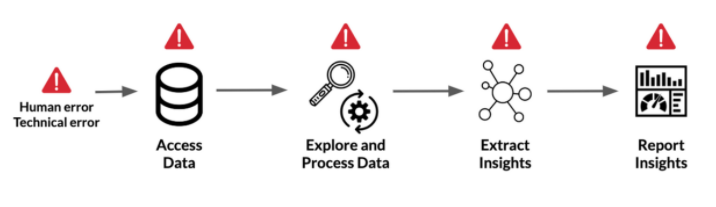

### Missing Value
Missing value merupakan kejadian yang umum terjadi ketika mengolah data dikarenakan data yang tidak tersedia sehingga terdapat beberapa data yang hilang. Missing value dapat dideteksi dengan munculnya nilai NaN (Not Available) atau blank space pada suatu tabel. Akan tetapi perlu diperhatikan juga bahwa tidak semua data yang missing disebabkan oleh kesalahan input. Terkadang terdapat kondisi dimana suatu kolom dibiarkan memiliki item yang kosong dikarenakan memang begitu adanya, misalnya terdapat data berupa fasilitas suatu rumah, dirumah tersebut tidak terdapat kolam renang, maka bisa jadi kolom kolam renang dalam data tersebut akan dikosongi. Oleh karena itu, memahami anda yang anda yang akan diolah sangat diperlukan.

In [ ]:
# Memunculkan informasi jumlah data dan tipe data tiap kolom dataset titanic.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   892 non-null    int64  
 1   PassengerId  892 non-null    int64  
 2   Survived     892 non-null    int64  
 3   Pclass       892 non-null    int64  
 4   Name         892 non-null    object 
 5   Sex          892 non-null    object 
 6   Age          715 non-null    float64
 7   SibSp        892 non-null    int64  
 8   Parch        892 non-null    int64  
 9   Ticket       892 non-null    object 
 10  Fare         892 non-null    float64
 11  Cabin        205 non-null    object 
 12  Embarked     890 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.7+ KB


Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada masing masing kolom. Pada "Range Index" tertulis 892 data terisi, sedangkan Kolom Age, Cabin, dan Embarked hanya memiliki jumlah data yang kurang dari 892. Hal tersebut mengindikasikan bahwa terdapat missing value pada kolom Age, Cabin, dan Embarked.

In [ ]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sebelum dilakukan cleaning data, sebaiknya kita mengetahui permasalahan apa yang terjadi pada kolom tersebut sehingga kita dapat menentukan penyelesaian apa yang sesuai dengan permasalahan missing value. <br>
Beberapa cara yang dapat dilakukan dalam mengatasi missing value, diantaranya :
1. Menghilangkan atau menghapus data yang hilang. Cara ini banyak digunakan apabila data yang kosong terlalu banyak lebih dari 60%.
2. Melakukan inputting value dengan data yang menyerupai seperti minimum value, maximum value, mean, median, atau modus. Penggunaan mean banyak digunakan apabila data tersebut adalah data kontinue, bukan kategorik data. Sedangkan modus digunakan ketika kolom yang kosong berisi informasi berupa data kategorik.
3. Melakukan manual inputting value dengan data yang sebenarnya (cara ini membutuhkan high effort untuk mencari data yang hilang tersebut)
4. Menentukan custom value berdasarkan asumsi bisnis yang terjadi.


In [ ]:
# menghitung ratio missing value pada metrics cabin
rasio = jumlah_missing.div(len(df))
rasio

Unnamed: 0     0.000000
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198430
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.770179
Embarked       0.002242
dtype: float64

In [ ]:
# Kolom Cabin memiliki jumlah missing value hingga 77% sehingga kolom Kabin lebih baik dihilangkan (drop) dari table
df = df.drop(['Cabin'], axis=1)

In [ ]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Kolom Age memiliki tipe data float64 sehingga kita harus mengetahui nilai mean dan median nya terlebih dahulu
df['Age'].describe()

count    715.000000
mean      29.684154
std       14.521835
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Kolom Age memiliki nilai mean dan median yang tidak terlalu jauh berbeda. Oleh karena itu permasalahan missing value pada kolom Age dapat diatasi dengan melakukan input nilai missing value dengan mean.

In [ ]:
# Mengubah NaNs dengan nilai Mean 
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [ ]:
# Cek kembali apakah masih terdapat missing value
pd.isnull(df).sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Berdasarkan pengecekan missing value, kolom Embarked bertipe data kategori dan terdapat missing value dikolom tersebut. Untuk data kategori kita bisa menggunakan imputasi nilai modus nya. Akan tetapi jika dilihat pada fungsi variabel Embarked, pelabelan dilakukan pelabuhan embarkasi setiap penumpang, oleh karena itu setiap penumpang seharusnya memiliki data pelabuhan embarkasi. Dalam kasus ini 2 missing value tersebut lebih baik kita hapus.

In [ ]:
# Menghapus missing value dengan drop baris yang missing
df = df.dropna(axis=0, how="any")

In [ ]:
# Cek kembali apakah masih terdapat missing value
pd.isnull(df).sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Duplicate
Duplicate issue terjadi ketika terdapat nilai atau ID yang berulang pada suatu data. Selain itu apabila suatu data memiliki informasi yang sama pada setiap kolomnya tanpa terkecuali data tersebut dianggap terduplikat.

In [ ]:
# Mengidentifikasi apakah terdapat duplicate value pada tabel dengan acuan kolom PassengerId
df[df["PassengerId"].duplicated(keep=False)].sort_values("PassengerId")

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S
891,891,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S


In [ ]:
# menghilangkan duplicate value pada tabel
df = df.drop_duplicates(subset=['PassengerId']).reset_index()

In [ ]:
# Cek kembali apakah masih ada data duplicate 
df[df.PassengerId.duplicated(keep=False)].sort_values("PassengerId")

,index,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Standardize and Normalize Data


Standarisasi merupakan suatu proses merubah skala data menjadi bentuk standard yang memiliki μ = 0 dan 𝛔 = 1, sehingga kita dapat membandingkan features yang memiliki skala dan unit berbeda. Proses ini digunakan apabila dalam suatu data terdapat perbedaan nilai yang cukup jauh antara satu kolom dengan kolom lainnya. Formula standarisasi sebagai berikut: <br>
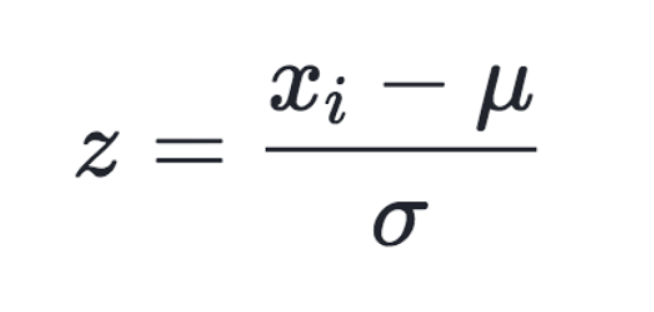

In [ ]:
# Mencari tau statistika deskriptif dari kolom Fare
df["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

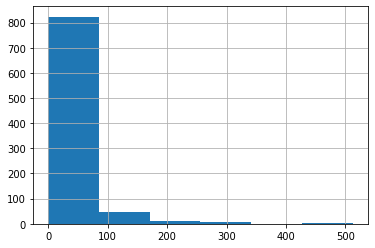

In [ ]:
# Memvisualisasikan variabel Fare
df["Fare"].hist(bins=6)

In [ ]:
# Berdasarkan rumus yang telah diketahui, kita dapat menstandardisasi variabel Fare
df['Fare_stand'] = (df["Fare"] - df["Fare"].mean()) / (df["Fare"].std())

In [ ]:
# Mengecek summary statistik kolom Fare_stand
df['Fare_stand'].describe()

count    8.890000e+02
mean     7.272023e-16
std      1.000000e+00
min     -6.458409e-01
25%     -4.869637e-01
50%     -3.549973e-01
75%     -2.206712e-02
max      9.663111e+00
Name: Fare_stand, dtype: float64

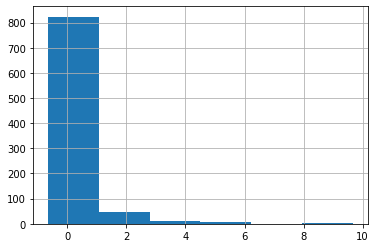

In [ ]:
df['Fare_stand'].hist(bins = 6)

Normalization merupakan suatu proses merubah skala nilai menjadi berdistribusi normal (Z : 0 ≤ z ≤ 1), dimana menggunakan formulasi sebagai berikut <br>

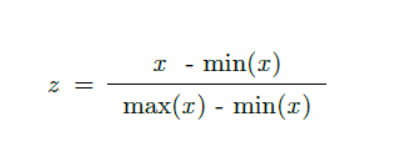

In [ ]:
# Normalisasi data Fare
df['Fare_norm'] = (df["Fare"] - df["Fare"].min()) / (df["Fare"].max() - d["Fare"].min())

In [ ]:
df["Fare_norm"].describe()

count    889.000000
mean       0.062649
std        0.097003
min        0.000000
25%        0.015412
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare_norm, dtype: float64

In [ ]:
df["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df[['Fare', 'Fare_stand', 'Fare_norm']].head(10)

,Fare,Fare_stand,Fare_norm
0,7.2500,-0.499958,0.014151
1,71.2833,0.788503,0.139136
2,7.9250,-0.486376,0.015469
3,53.1000,0.422623,0.103644
4,8.0500,-0.483861,0.015713
5,8.4583,-0.475645,0.016510
6,51.8625,0.397723,0.101229
7,21.0750,-0.221775,0.041136
8,11.1333,-0.421820,0.021731
9,30.0708,-0.040764,0.058694


### Export Data


In [ ]:
# Data with Fare standardization and Normalization
df.head(10)


,index,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_stand,Fare_norm
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.499958,0.014151
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.788503,0.139136
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.486376,0.015469
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.422623,0.103644
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.483861,0.015713
5,5,5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,-0.475645,0.016510
6,6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0.397723,0.101229
7,7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,-0.221775,0.041136
8,8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,-0.421820,0.021731
9,9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,-0.040764,0.058694


In [ ]:
# Export Data
df.to_csv(path + 'Titanic with standardized and normalized data.csv')

## 2. Data Manipulation
- Check and changing data type
- Renaming
- Removing 
- Filtering Dataset

### Check and change data type
Dalam data terkadang sering dijumpai kasus bahwa tipe data tidak sesuai dengan item didalamnya. Misalnya isi suatu kolom merupakan integer, namun setelah dilakukan pengecekan tipe data, ternyata hasil mengatakan bahwa kolom tersebut bertipe data string. Oleh karena itu perlu dilakukan manipulasi tipe data pada kolom tersebut.

In [ ]:
# Mengecek tipe data salah satu kolom
df["Parch"].dtypes

dtype('int64')

In [ ]:
# Mengubah data type
df['Parch_string'] = df['Parch'].astype(str)
df['PassengerId_string'] = df['PassengerId'].astype(str)

In [ ]:
# Cek kembali tipe data
df["Parch_string"].dtypes

dtype('O')

In [ ]:
# Cek kembali tipe data
df["PassengerId_string"].dtypes

dtype('O')

In [ ]:
# Cek semua tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               889 non-null    int64  
 1   Unnamed: 0          889 non-null    int64  
 2   PassengerId         889 non-null    int64  
 3   Survived            889 non-null    int64  
 4   Pclass              889 non-null    int64  
 5   Name                889 non-null    object 
 6   Sex                 889 non-null    object 
 7   Age                 889 non-null    float64
 8   SibSp               889 non-null    int64  
 9   Parch               889 non-null    int64  
 10  Ticket              889 non-null    object 
 11  Fare                889 non-null    float64
 12  Embarked            889 non-null    object 
 13  Fare_stand          889 non-null    float64
 14  Fare_norm           889 non-null    float64
 15  Parch_string        889 non-null    object 
 16  Passenge

### Renaming
Renaming banyak dilakukan untuk merubah nama kolom dalam suatu data. Mengubah nama kolom menjadi nama lain yang dirasa lebih sesuai atau membantu diperbolehkan.

In [ ]:
df = df.rename(columns={"Pclass": "PassengerClass", "Sex": "Gender", "SibSp":"Num_Sibling", "Parch":"Num_Parent"})

In [ ]:
df.head()

,index,Unnamed: 0,PassengerId,Survived,PassengerClass,Name,Gender,Age,Num_Sibling,Num_Parent,Ticket,Fare,Embarked,Fare_stand,Fare_norm,Parch_string,PassengerId_string
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.499958,0.014151,0,1
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.788503,0.139136,0,2
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.486376,0.015469,0,3
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.422623,0.103644,0,4
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.483861,0.015713,0,5


### Removing
Removing adalah memanipulasi data dengan menghilangkan informasi-informasi yang tidak diperlukan dalam proses analisis, misalnya menghilangkan kolom atau baris dalam suatu data.

In [ ]:
# Memilih beberapa kolom pada dataframe
df_passenger = df[['PassengerId', 'Name', 'Gender', 'Age','Ticket']]

In [ ]:
df_passenger.head()

,PassengerId,Name,Gender,Age,Ticket
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803
4,5,"Allen, Mr. William Henry",male,35.0,373450


In [ ]:
# Menghilangkan kolom Age pada data yang akan dianalisis
df_passenger_clean = df_passenger.drop(['Age'], axis=1)
df_passenger_clean.head()

,PassengerId,Name,Gender,Ticket
0,1,"Braund, Mr. Owen Harris",male,A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,5,"Allen, Mr. William Henry",male,373450


In [ ]:
df_passenger_clean.iloc[:2]

,PassengerId,Name,Gender,Ticket
0,1,"Braund, Mr. Owen Harris",male,A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599


### Filtering Dataset
Filtering dataset filtering digunakan agar hasil analisa kita dapat mengerucut ke objective atau tujuan analisis tersebut.

In [ ]:
df.head()

,index,Unnamed: 0,PassengerId,Survived,PassengerClass,Name,Gender,Age,Num_Sibling,Num_Parent,Ticket,Fare,Embarked,Fare_stand,Fare_norm,Parch_string,PassengerId_string
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.499958,0.014151,0,1
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.788503,0.139136,0,2
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.486376,0.015469,0,3
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.422623,0.103644,0,4
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.483861,0.015713,0,5


In [ ]:
# Memfilter 2 data pertama PassengerId dan Name
df[['PassengerId','Name']].iloc[0:2]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


In [ ]:
# Memfilter seluruh data penumpang laki-laki
male = df[df['Gender'] == 'male']

In [ ]:
male.head()

,PassengerId,Survived,PassengerClass,Name,Gender,Age,Num_Sibling,Num_Parent,Fare,Embarked,Parch_stand,Parch_norm,Parch_string,PassengerId_string
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,-0.473408,-0.063599,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,-0.473408,-0.063599,0,5
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,8.4583,Q,-0.473408,-0.063599,0,6
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,-0.473408,-0.063599,0,7
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0.767199,0.103068,1,8


In [ ]:
# Memfilter seluruh data penumpangan balita (usia 5 tahun ke bawah)
balita = df[df['Age'] <= 5]

In [ ]:
balita.head()

,index,Unnamed: 0,PassengerId,Survived,PassengerClass,Name,Gender,Age,Num_Sibling,Num_Parent,Ticket,Fare,Embarked,Fare_stand,Fare_norm,Parch_string,PassengerId_string
7,7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,-0.221775,0.041136,1,8
10,10,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,-0.309808,0.032596,1,11
16,16,16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,-0.059795,0.056848,1,17
43,43,43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,C,0.190805,0.081157,2,44
58,58,58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,S,-0.087463,0.054164,2,59


## 3. Data Wrangling
- Merging
- Grouping
- Transformation
- Data Correlation

### Merging
Merging merupakan proses penggabungan dua atau lebih tabel menjadi satu tabel agar memudahkan dalam mengolah suatu data. 

In [ ]:
# Kita memiliki 2 tabel, yaitu tabel survived dan tabel age dimana PassgerId sebagai primary key
survived = df[['PassengerId','Survived']]
age = df[['PassengerId','Age']]


In [ ]:
survived.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [ ]:
age.head()

,PassengerId,Age
0,1,22.0
1,2,38.0
2,3,26.0
3,4,35.0
4,5,35.0


In [ ]:
# Menggabungkan Tabel survived dengan tabel Age dengan PassengerId menjadi key nya
df_new = survived.merge(age, how='left', on='PassengerId')

In [ ]:
df_new.head()

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0


### Grouping
Grouping dapat digunakan untuk agregasi dan mengelompokkan berdasarkan kolom tertentu.


In [ ]:
df.groupby(by=["Survived", "Gender"], dropna=False).count()[['PassengerId']]

PassengerId
Survived Gender             
0        female           81
         male            468
1        female          231
         male            109

### Transformation
Data transformation merupakan suatu proses merubah format, struktur, atau nilai dari suatu data. 

In [ ]:
df.head()

,index,Unnamed: 0,PassengerId,Survived,PassengerClass,Name,Gender,Age,Num_Sibling,Num_Parent,Ticket,Fare,Embarked,Fare_stand,Fare_norm,Parch_string,PassengerId_string
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.499958,0.014151,0,1
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.788503,0.139136,0,2
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.486376,0.015469,0,3
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.422623,0.103644,0,4
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.483861,0.015713,0,5


In [ ]:
# Contoh penerapan fungsi transformasi x*100 pada data Fare
df['Fare_transform'] = df['Fare'].transform(func = lambda x : x * 100)

In [ ]:
df.head()

,index,Unnamed: 0,PassengerId,Survived,PassengerClass,Name,Gender,Age,Num_Sibling,Num_Parent,Ticket,Fare,Embarked,Fare_stand,Fare_norm,Parch_string,PassengerId_string,Fare_transform
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.499958,0.014151,0,1,725.00
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.788503,0.139136,0,2,7128.33
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.486376,0.015469,0,3,792.50
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.422623,0.103644,0,4,5310.00
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.483861,0.015713,0,5,805.00


### Data Correlation
Data correlation digunakan untuk mengetahui seberapa besar hubungan antara 2 variabel.
Nilai korelasi berada dalam rentang -1 hingga 1. Semakin mendekati 1 atau -1 nilai korelasinya maka semakin kuat hubungan antara 2 variabel tersebut. Nilai korelasi yang positif berarti 2 variabel tersebut memiliki hubungan searah/linier, apabila nilai salah satu variabelnya bertambah maka nilai variabel lainnya juga bertambah. Berlaku kebalikannya, Nilai korelasi yang negatif berarti 2 variabel memiliki hubungan berlawanan, pabila nilai salah satu variabelnya bertambah maka nilai variabel lainnya akan berkurang.

In [ ]:
df_2 = pd.read_csv(path + 'iris.csv')

In [ ]:
df_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Mencari korelasi antara kolom petal_length dan petal_width
df_correlation = df_2[['petal_length','petal_width']]
df_correlation.corr()

,petal_length,petal_width
petal_length,1.000000,0.962757
petal_width,0.962757,1.000000


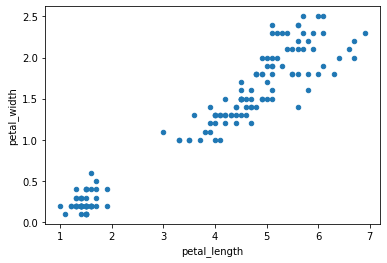

In [ ]:
# Memvisualisasikan 2, petal_length dan petal_width untuk melihat korelasi
df_2.plot.scatter(x='petal_length', y='petal_width')

In [ ]:
# Mencari korelasi antar kolom pada dataset
df_2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


> Petal_length dan sepal_length memiliki hubungan yang kuat. Petal_width dan sepal_length berkorelasi kuat. Petal_width dan petal_length memiliki hubungan yang sangat kuat.